In [23]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib

# Inlezen van de dataset en overzicht

In [18]:
#Inlezen van de dataset
dataset = pd.read_csv('pokecombat_train.csv',';')

df = pd.DataFrame(dataset)

dataset.head(10)

,poke1,poke2,leveldiff,attackdiff,defensediff,hpdiff,specialdiff,speediff,powerdiff,effectivitydiff,ratingdiff,win
0,nidoking,victreebel,6,8,14,19,-1,22,120,0.00,-0.12,True
1,starmie,hitmonchan,-2,-59,-11,-10,93,54,22,0.50,-0.04,True
2,farfetch'd,marowak,-16,-29,-67,-36,-20,-10,-15,1.00,0.45,True
3,scyther,seadra,4,59,-11,31,-42,28,40,0.00,0.12,False
4,venonat,doduo,-23,-66,-27,-48,-36,-61,-95,-4.00,-1.22,False
5,haunter,nidoking,-7,-34,-28,-35,0,-18,-95,2.75,0.07,True
6,starmie,tentacool,0,88,98,40,7,89,5,1.00,-0.52,True
7,sandshrew,blastoise,-8,-27,-31,-65,-79,-56,10,-2.00,0.18,False
8,magikarp,poliwhirl,23,-107,1,-32,-49,-2,-20,-1.50,-1.60,False
9,kangaskhan,oddish,9,27,23,44,4,32,18,1.00,0.70,True


In [25]:
# stap overgeslagen
#x = df.select_dtypes(include=['number']) \
                #.apply(LabelEncoder().fit_transform) \
                #.join(df.select_dtypes(include=['number']))
        
#x.head(10)

In [70]:
# Beschrijvende statistische analyse
dataset.describe()

,leveldiff,attackdiff,defensediff,hpdiff,specialdiff,speediff,powerdiff,effectivitydiff,ratingdiff
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.405971,1.169707,1.091980,1.627808,1.227546,1.228186,-0.126838,-0.011571,-0.006218
std,13.802009,52.992046,53.408511,62.836760,54.608859,52.244489,81.048280,1.889134,0.804777
min,-24.000000,-286.000000,-360.000000,-527.000000,-285.000000,-304.000000,-540.000000,-13.500000,-3.220000
25%,-11.000000,-30.000000,-29.000000,-36.000000,-30.000000,-29.000000,-50.000000,-1.000000,-0.550000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,31.000000,30.000000,39.000000,32.000000,31.000000,50.000000,1.000000,0.530000
max,25.000000,289.000000,376.000000,523.000000,283.000000,283.000000,570.000000,15.000000,3.330000


# Visualiseren van de dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B4C51F668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023B4C5C40B8>]], dtype=object)

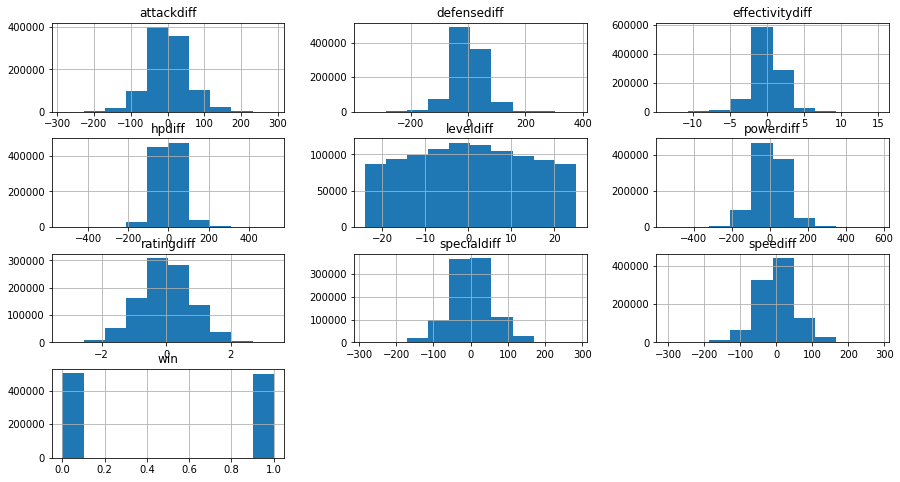

In [71]:
# Histogram
dataset.hist(figsize=(15,8))

leveldiff              Axes(0.125,0.71587;0.168478x0.16413)
attackdiff          Axes(0.327174,0.71587;0.168478x0.16413)
defensediff         Axes(0.529348,0.71587;0.168478x0.16413)
hpdiff              Axes(0.731522,0.71587;0.168478x0.16413)
specialdiff           Axes(0.125,0.518913;0.168478x0.16413)
speediff           Axes(0.327174,0.518913;0.168478x0.16413)
powerdiff          Axes(0.529348,0.518913;0.168478x0.16413)
effectivitydiff    Axes(0.731522,0.518913;0.168478x0.16413)
ratingdiff            Axes(0.125,0.321957;0.168478x0.16413)
win                Axes(0.327174,0.321957;0.168478x0.16413)
dtype: object

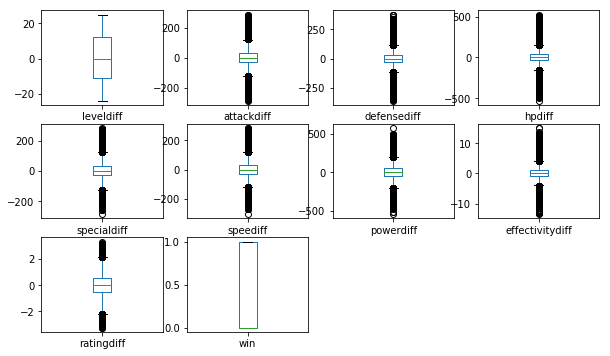

In [74]:
# Box plot
dataset.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,8))

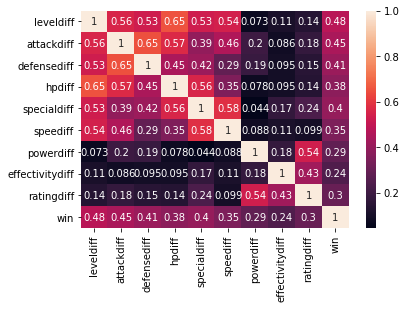

In [75]:
# Correlation plot
Corr=dataset[dataset.columns].corr() 
sns.heatmap(Corr, annot=True)

# Preprocessing en opsplitsen in training en test set

In [21]:
# Opsplitsen in features en targets van trainingsset
features = list(dataset[['leveldiff','attackdiff','defensediff','hpdiff','specialdiff','speediff','powerdiff','effectivitydiff','ratingdiff']])
print(features)
X_train = dataset[features].values

y_train = dataset['win'].values


# Normalisatie van de dataset
standard_scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
max_abs_scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train_standard = standard_scaler.transform(X_train)
X_train_max_abs = max_abs_scaler.transform(X_train)
X_train_min_max = min_max_scaler.transform(X_train)

print(X_train_standard.shape)
print(X_train_max_abs.shape)
print(X_train_min_max.shape)

['leveldiff', 'attackdiff', 'defensediff', 'hpdiff', 'specialdiff', 'speediff', 'powerdiff', 'effectivitydiff', 'ratingdiff']
(1000000, 9)
(1000000, 9)
(1000000, 9)


# Logistic regression

## Initialiseren en trainen van de logistic regression classifier

In [19]:
#Inlezen van de dataset
dataset2 = pd.read_csv('pokecombat_test.csv',';')

df2 = pd.DataFrame(dataset2)

dataset2.head(10)

,poke1,poke2,leveldiff,attackdiff,defensediff,hpdiff,specialdiff,speediff,powerdiff,effectivitydiff,ratingdiff,win
0,magmar,charmander,2,55,13,44,38,27,-165,0.00,-0.66,False
1,dewgong,dewgong,8,-4,-4,17,4,9,0,0.25,-0.15,True
2,rapidash,rapidash,-16,-36,-26,-38,-34,-36,0,0.00,0.00,False
3,staryu,rhydon,2,-134,-82,-120,58,70,-55,2.00,0.53,False
4,vulpix,nidoqueen,-11,-53,-53,-67,-33,-27,-33,0.00,-0.54,False
5,dragonair,victreebel,-13,-88,-57,-89,-91,-26,-120,1.50,-0.57,False
6,wigglytuff,psyduck,-22,-28,-32,-47,-30,-32,50,3.00,1.48,False
7,golduck,bulbasaur,-5,6,2,1,-2,16,160,0.00,-1.09,False
8,ninetales,alakazam,-15,-20,-15,-35,-54,-42,-90,0.00,-0.37,False
9,ponyta,doduo,-13,-27,-7,-25,-5,-31,-75,0.00,-0.96,True


In [32]:
#stap overgeslagen
#x2 = df2.select_dtypes(exclude=['number']) \
                #.apply(LabelEncoder().fit_transform) \
                #.join(df2.select_dtypes(include=['number']))
        
#x2.head(10)

In [20]:
# Opsplitsen in features en targets van testset

features = list(dataset2[['leveldiff','attackdiff','defensediff','hpdiff','specialdiff','speediff','powerdiff','effectivitydiff','ratingdiff']])
X_test = dataset2[features].values
y_test= dataset2['win'].values

# Normalisatie van de dataset
X_test_standard = standard_scaler.transform(X_test)
X_test_max_abs = max_abs_scaler.transform(X_test)
X_test_min_max = min_max_scaler.transform(X_test)

print(X_test_standard.shape)
print(X_test_max_abs.shape)
print(X_test_min_max.shape)

(249999, 9)
(249999, 9)
(249999, 9)


## Initialiseren van de logistic regression classifier met standard scaled data

In [24]:
# Initialiseren van de logistic regression classifier
logreg = linear_model.LogisticRegression(C=1,class_weight= None)
#logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced')

# Training van het model
logreg.fit(X_train_standard, y_train)

##print('De bias = theta_0: ', logreg.intercept_)
##print('De coefficienten theta: ',logreg.coef_)

# Testen van het model op de test set
y_pred = logreg.predict(X_test_standard)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
joblib.dump(logreg, 'logreg.pb1', compress=9)

             precision    recall  f1-score   support

      False       0.74      0.74      0.74    126130
       True       0.74      0.74      0.74    123869

avg / total       0.74      0.74      0.74    249999

[[93926 32204]
 [32404 91465]]
74.1566966268


['logreg.pb1']

In [53]:
# Initialiseren van de logistic regression classifier met standard scaling
#logreg = linear_model.LogisticRegression(C=1,class_weight= None)

#logreg = linear_model.LogisticRegression(C=0.1,class_weight= 'balanced')
logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced',solver= 'sag')
# Training van het model
logreg.fit(X_train_max_abs, y_train)

print('De bias = theta_0: ', logreg.intercept_)
print('De coefficienten theta: ',logreg.coef_)

# Testen van het model op de test set
y_pred = logreg.predict(X_test_max_abs)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

De bias = theta_0:  [-0.03983097]
De coefficienten theta:  [[ 0.90827434  2.81451663  1.47878719 -0.38423397  2.24738917  0.18320267
   3.52476838  3.05494495  0.34383195]]
             precision    recall  f1-score   support

      False       0.74      0.75      0.74     12512
       True       0.74      0.74      0.74     12487

avg / total       0.74      0.74      0.74     24999

[[9328 3184]
 [3221 9266]]
74.378975159


In [54]:
# Initialiseren van de logistic regression classifier met standard scaling
#logreg = linear_model.LogisticRegression(C=0.2,class_weight= None)
logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced',solver= 'sag')
#logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced')

# Training van het model
logreg.fit(X_train_min_max, y_train)

print('De bias = theta_0: ', logreg.intercept_)
print('De coefficienten theta: ',logreg.coef_)
# Testen van het model op de test set

y_pred = logreg.predict(X_test_min_max)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

De bias = theta_0:  [-13.67620686]
De coefficienten theta:  [[ 1.75245905  5.39525863  2.89500586 -0.67664433  4.40466849  0.3865841
   6.6509422   5.57576435  0.7218353 ]]
             precision    recall  f1-score   support

      False       0.74      0.75      0.74     12512
       True       0.74      0.74      0.74     12487

avg / total       0.74      0.74      0.74     24999

[[9329 3183]
 [3223 9264]]
74.374974999


## Testen van het model op de test set

In [22]:
# Testen van het model op de test set
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

             precision    recall  f1-score   support

      False       0.74      0.74      0.74     12512
       True       0.74      0.74      0.74     12487

avg / total       0.74      0.74      0.74     24999

[[9297 3215]
 [3191 9296]]
74.374974999


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [16]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

print(patient)
y_patient = logreg.predict(patient.reshape(1,-1))
y_patient_prob = logreg.predict_proba(patient.reshape(1,-1))
print(y_patient)
print(y_patient_prob)

if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')

ValueError: operands could not be broadcast together with shapes (1,8) (11,) (1,8) 

# SVM zonder kernel (= lineaire kernel)

## Initialiseren en trainen van SVM 

In [11]:
SVMlinear = svm.SVC(kernel='linear',C=0.1)
SVMlinear.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testen van het model op test set

In [18]:
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1223
          1       0.85      0.86      0.86      1276

avg / total       0.86      0.86      0.86      2499

[[1036  187]
 [ 174 1102]]
85.5542216887


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [70]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMlinear.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# SVM met kernel

## Initialiseren en trainen van de SVM

In [19]:
SVMkernel = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Inlezen van de test set

## Testen van het model op test set

In [14]:
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

NameError: name 'SVMkernel' is not defined

## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [75]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMmodel.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# Gridsearch en cross-validation

## Gridsearch op logistic regression

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Best accuracy :  0.869
Best parameters : {'C': 1}
             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1223
          1       0.86      0.87      0.86      1276

avg / total       0.86      0.86      0.86      2499

[[1037  186]
 [ 168 1108]]
85.8343337335


## Gridsearch op SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
paramaters = [ 
        {'kernel': ['linear'], 'C': np.linspace(1,20,100)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


